# Bài tập tuần 13
Áp dụng các kĩ thuật tiền xử lý dữ liệu text và lựa chọn các mô hình học máy để áp dụng vào bài toán phân tích văn bản:

ML Dataset, có thể tìm dataset trong này: https://github.com/thieu1995/csv-files/tree/main/data/text và https://github.com/sreeram004/Machine-Learning

Ở đây tôi sẽ Lựa chọn bài toán Email spam detection model với dataset emails.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [5]:
# Load the dataset from the uploaded file
file_path = "C:/Users\Yoga\Documents\PKA\Ky 3 Nam 3\Lập trình cho trí tuệ nhân tạo\emails.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Apply text preprocessing
data['text'] = data['text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['spam'], test_size=0.2, random_state=42)


In [7]:
# Define the models and their parameter grids
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC()
}

# Define the parameter grids for each model
param_grids = {
    'MultinomialNB': {'clf__alpha': [0.1, 0.5, 1.0]},
    'LogisticRegression': {'clf__C': [0.1, 1, 10]},
    'SVC': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}
}

# Create a pipeline with TF-IDF vectorizer and the classifier
pipelines = {model: Pipeline([('tfidf', TfidfVectorizer()), ('clf', clf)]) for model, clf in models.items()}

# Perform GridSearchCV and evaluate each model
best_models = {}
for model_name in pipelines:
    print(f"Training {model_name}...")
    pipeline = pipelines[model_name]
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

    # Make predictions and evaluate the model
    y_pred = best_models[model_name].predict(X_test)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")


Training MultinomialNB...
Best parameters for MultinomialNB: {'clf__alpha': 0.1}
Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       856
           1       1.00      0.91      0.95       290

    accuracy                           0.98      1146
   macro avg       0.98      0.95      0.97      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix for MultinomialNB:
[[855   1]
 [ 27 263]]
Training LogisticRegression...
Best parameters for LogisticRegression: {'clf__C': 10}
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.96      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

Confusion Matrix for LogisticRegr

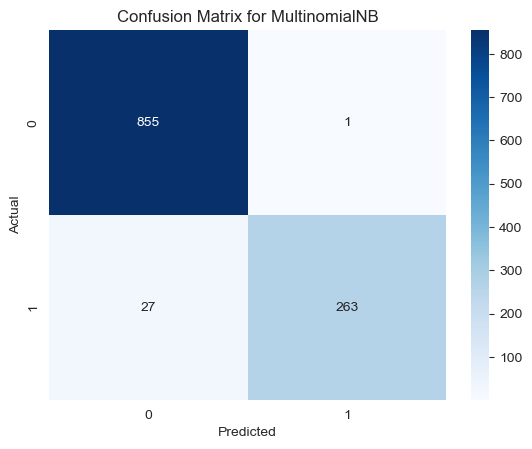

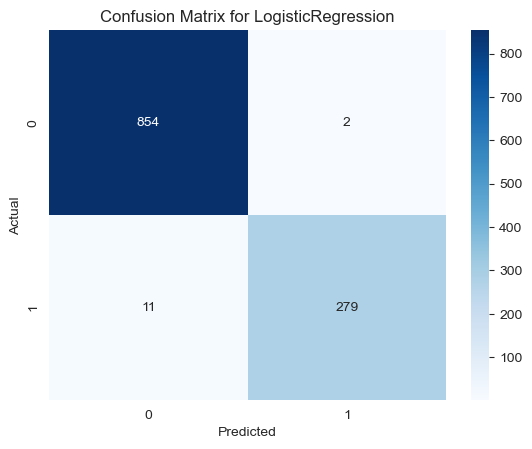

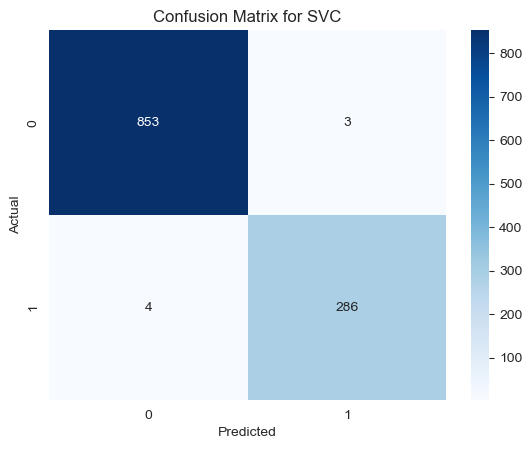

In [8]:
# Visualize the confusion matrix for the best model
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
for model_name in best_models:
    y_pred = best_models[model_name].predict(X_test)
    plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix for {model_name}")
